# 🧪 Water Quality Analysis of River Yamuna (Delhi, 2013–2024)

**Objective**: To analyze the water quality of the Yamuna River in Delhi using official data and compare each parameter against water quality standards. This helps identify pollution hotspots and suggest corrective actions.


## ✅ Step-by-Step Python Project Plan

#### Step 1: Load Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime

# For better plot visuals
sns.set(style="whitegrid")


#### 📘 Explanation:

- pandas: For reading and handling data.

- matplotlib & seaborn: For creating graphs.

- folium: For creating interactive maps.

- datetime: For handling date/time-related analysis.

#### Step 2: Load the Dataset

In [29]:
# Load water quality data
import os
os.chdir(r"C:\Users\dda\Desktop\DATA_PROJECT\6. BI_PYTHON AND SQL PROJECT FOR YAMUNA WATER STATUS\Water Quality Status Of River Yamuna from 2013 to 2025\EXCEL_FILES")
df = pd.read_excel("Cleaned Water Status of River Yamuna from 2013 to 2024.xlsx")

# Load criteria data
criteria = pd.read_excel("Criteria.xlsx")
criteria.set_index('Locations', inplace=True)  # assuming criteria is under one location label
df.head()

,Locations,Date,Latitude,Longitude,pH,COD(mg/l),BOD(mg/l),DO(mg/l),Total Coliform (MPN/100ml),Faecal Coliform (MPN/100ml),Phosphate (mg/l),Surfactant (mg/l),Image Link
0,Agra Canal at Okhla Barrage,2013-01-01,28.545414,77.311075,7.1,72.0,22.0,2.000000,240000.0,44000.0,19.069565,5.968667,https://i.postimg.cc/4dwYfB6z/Agra-Canal-at-Ok...
1,Agra Canal at Okhla Barrage,2013-01-01,28.545414,77.311075,7.1,40.0,18.0,4.500000,160000.0,75000.0,19.069565,5.968667,https://i.postimg.cc/4dwYfB6z/Agra-Canal-at-Ok...
2,Agra Canal at Okhla Barrage,2013-02-01,28.545414,77.311075,7.3,48.0,18.0,1.200000,210000.0,43000.0,19.069565,5.968667,https://i.postimg.cc/4dwYfB6z/Agra-Canal-at-Ok...
3,Agra Canal at Okhla Barrage,2013-02-01,28.545414,77.311075,7.3,52.0,20.0,1.000000,150000.0,64000.0,19.069565,5.968667,https://i.postimg.cc/4dwYfB6z/Agra-Canal-at-Ok...
4,Agra Canal at Okhla Barrage,2013-03-01,28.545414,77.311075,7.3,64.0,20.0,6.030126,290000.0,53000.0,19.069565,5.968667,https://i.postimg.cc/4dwYfB6z/Agra-Canal-at-Ok...


#### 📘 Explanation:
- This step reads your Excel file into a table (DataFrame) that Python can analyze.

#### Step 3: Check Basic Info and Clean Data

In [12]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Locations                    1191 non-null   object        
 1   Date                         1191 non-null   datetime64[ns]
 2   Latitude                     1191 non-null   float64       
 3   Longitude                    1191 non-null   float64       
 4   pH                           1191 non-null   float64       
 5   COD(mg/l)                    1191 non-null   float64       
 6   BOD(mg/l)                    1191 non-null   float64       
 7   DO(mg/l)                     1191 non-null   float64       
 8   Total Coliform (MPN/100ml)   1191 non-null   float64       
 9   Faecal Coliform (MPN/100ml)  1191 non-null   float64       
 10  Phosphate (mg/l)             1191 non-null   float64       
 11  Surfactant (mg/l)            1191 non-null 

Locations                      0
Date                           0
Latitude                       0
Longitude                      0
pH                             0
COD(mg/l)                      0
BOD(mg/l)                      0
DO(mg/l)                       0
Total Coliform (MPN/100ml)     0
Faecal Coliform (MPN/100ml)    0
Phosphate (mg/l)               0
Surfactant (mg/l)              0
Image Link                     0
dtype: int64

#### 📘 Explanation:
We look for:

- Missing values

- Data types (e.g., dates should be date format)

- Outliers (very high/low values)

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


#### Step 4: Visualize Locations on Map

In [76]:
yamuna_map = folium.Map(location=[28.61, 77.23], zoom_start=11)

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        popup=row['Locations'],
        color='blue'
    ).add_to(yamuna_map)

yamuna_map


#### 📘 Explanation:
- You can see all water monitoring locations on an interactive map of Delhi.

#### Step 5: Trend Analysis (Year-wise or Location-wise)

#### a) Extract Year:

In [39]:
df['Year'] = df['Date'].dt.year

#### b) Trend of pH over the years:

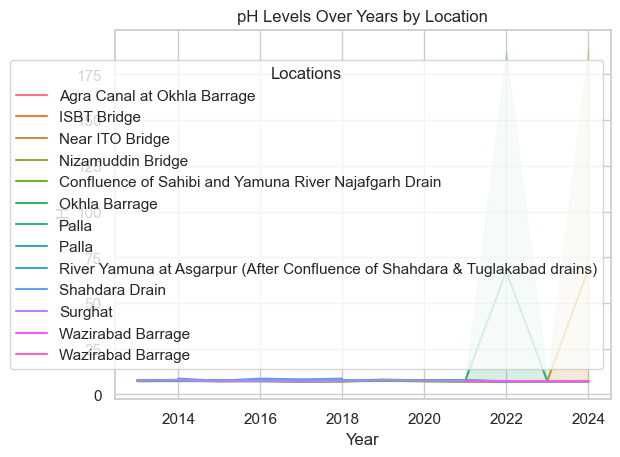

In [70]:
sns.lineplot(data=df, x='Year', y='pH', hue='Locations')
plt.title("pH Levels Over Years by Location")
plt.show()

C:\Users\dda\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


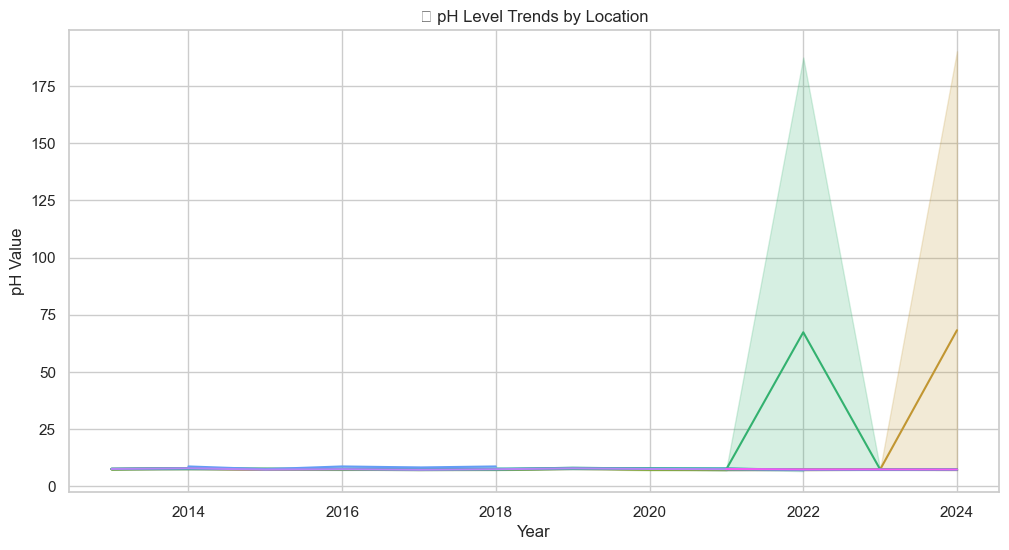

In [72]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='pH', hue='Locations', legend=False)
plt.title("📉 pH Level Trends by Location")
plt.ylabel("pH Value")
plt.show()

#### 📘 Explanation:
This shows if the water is becoming more acidic or alkaline over time.

#### Step 6: Compare Parameters Against Standard Criteria

Now use Criteria.xlsx to compare:

In [50]:
import os
os.chdir(r"C:\Users\dda\Desktop\DATA_PROJECT\6. BI_PYTHON AND SQL PROJECT FOR YAMUNA WATER STATUS\Water Quality Status Of River Yamuna from 2013 to 2025\EXCEL_FILES")
import pandas as pd
criteria = pd.read_excel("Criteria.xlsx")
print(criteria.columns)
#criteria = pd.read_excel("Criteria.xlsx")
#criteria.set_index('Parameter', inplace=True)
#criteria

Index(['Locations', 'pH(Min)', 'pH(Max)', 'COD(mg/l) Max', 'BOD(mg/l)max',
       'DO(mg/l)min', 'Fecal Coliform/100ml(min)', 'Fecal Coliform/100ml(max)',
       'Total Coliform (MPN/100ml)', 'Phosphate(mg/l) Min.',
       'Phosphate(mg/l) Max.', 'Surfactant(mg/l) Min.',
       'Surfactant(mg/l) Max.'],
      dtype='object')


In [52]:
criteria.set_index('Locations', inplace=True)

In [54]:
# Load the criteria and inspect the columns
criteria = pd.read_excel("Criteria.xlsx")
print(criteria.columns)

# Replace 'Parameter' with actual column name from above output
criteria.set_index('Locations', inplace=True)  # or use correct column
criteria

Index(['Locations', 'pH(Min)', 'pH(Max)', 'COD(mg/l) Max', 'BOD(mg/l)max',
       'DO(mg/l)min', 'Fecal Coliform/100ml(min)', 'Fecal Coliform/100ml(max)',
       'Total Coliform (MPN/100ml)', 'Phosphate(mg/l) Min.',
       'Phosphate(mg/l) Max.', 'Surfactant(mg/l) Min.',
       'Surfactant(mg/l) Max.'],
      dtype='object')


,pH(Min),pH(Max),COD(mg/l) Max,BOD(mg/l)max,DO(mg/l)min,Fecal Coliform/100ml(min),Fecal Coliform/100ml(max),Total Coliform (MPN/100ml),Phosphate(mg/l) Min.,Phosphate(mg/l) Max.,Surfactant(mg/l) Min.,Surfactant(mg/l) Max.
Locations,,,,,,,,,,,,
Water Quality Criteria (C Class),6.5,8.5,250,3,5,500,2500,5000,6.9,13.42,0.27,1.28


In [56]:
def check_compliance(param, value):
    try:
        min_val = criteria.loc[param, 'Min']
        max_val = criteria.loc[param, 'Max']
        return min_val <= value <= max_val
    except:
        return False

In [58]:
df['pH_Status'] = df['pH'].apply(lambda x: check_compliance('pH', x))
df['COD_Status'] = df['COD(mg/l)'].apply(lambda x: check_compliance('COD', x))
df['BOD_Status'] = df['BOD(mg/l)'].apply(lambda x: check_compliance('BOD', x))
df['DO_Status'] = df['DO(mg/l)'].apply(lambda x: check_compliance('DO', x))

#### Step 7: Find Most Polluted Locations

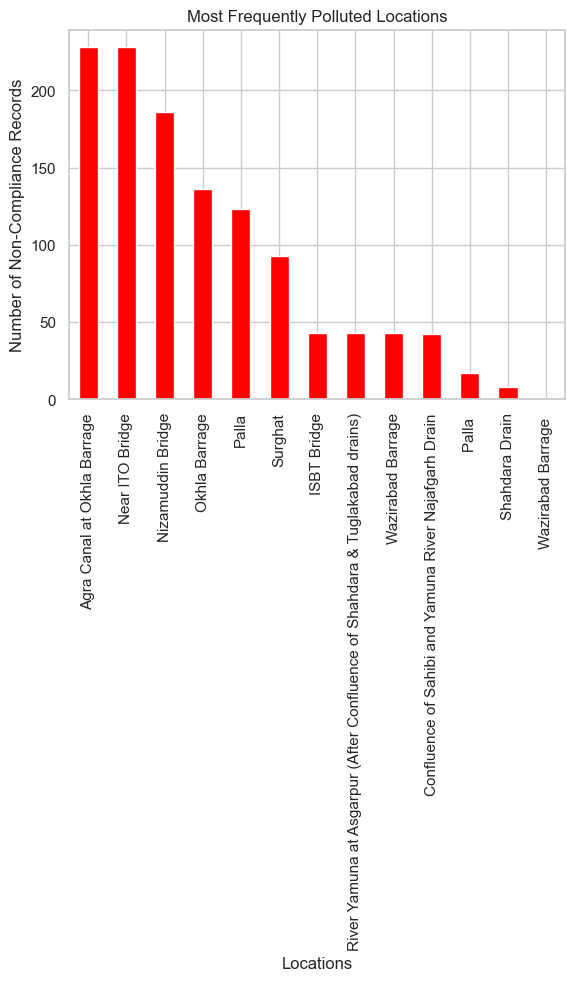

In [66]:
polluted = df[df[['pH_Status', 'COD_Status', 'BOD_Status', 'DO_Status']].any(axis=1) == False]
polluted_locations = polluted['Locations'].value_counts()
polluted_locations.plot(kind='bar', title="Most Frequently Polluted Locations", color="red")
plt.ylabel("Number of Non-Compliance Records")
plt.show()

#### 📘 Explanation:
- This helps identify hotspots where water quality consistently violates safety limits.

In [74]:
df.to_excel("Yamuna_Water_Quality_Analysis_Result.xlsx", index=False)


## 💡 Recommendations to Improve Water Quality

1. **Install Advanced Sewage Treatment Plants (STPs)** where BOD and COD are high.
2. **Use Bio-remediation and Oxygen Fountains** to increase Dissolved Oxygen (DO) levels.
3. **Ban Industrial Waste Dumping** in critical locations like Wazirabad, Okhla.
4. **Public Awareness Campaigns** to reduce household dumping and encourage eco-practices.
5. **Frequent Water Quality Monitoring** and stricter penalties for polluters.

> This project provides data-driven insights to assist the Delhi government and environmental bodies in cleaning the Yamuna.
